In [1]:
import sys
print(sys.path)

['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/ubuntu/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/ubuntu/.ipython']


In [6]:
!pip install fastai
from fastai.vision import *

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pf
import numpy as np
from pathlib import Path


In [8]:
bs = 64

In [9]:
np.random.seed(42)
data1 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//2).normalize(imagenet_stats)

data2 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//4).normalize(imagenet_stats)

data3 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//4).normalize(imagenet_stats)

data4 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//8).normalize(imagenet_stats)

data5 = ImageDataBunch.from_folder('data', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=bs//4).normalize(imagenet_stats)


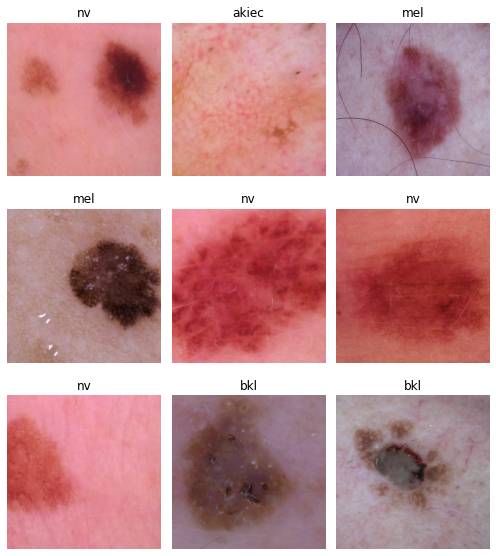

In [10]:
data1.show_batch(rows=3, figsize=(7,8))

In [11]:
metrics = [accuracy]

In [12]:
learn1 = cnn_learner(data1, models.resnet50, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn2 = cnn_learner(data2, models.resnet152, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn3 = cnn_learner(data3, models.densenet201, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn4 = cnn_learner(data4, models.vgg19_bn, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])
learn5 = cnn_learner(data5, models.alexnet, metrics=metrics, callback_fns=[partial(callbacks.CSVLogger, append=True)])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet50-19c8e357.pth


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet152-b121ed2d.pth


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /home/ubuntu/.cache/torch/checkpoints/densenet201-c1103571.pth


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /home/ubuntu/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/ubuntu/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [13]:
learn = [learn1, learn2, learn3, learn4, learn5]

In [14]:
for mod in learn:
    mod.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.568380,1.041256,0.716425,04:37
1,0.944969,0.667525,0.768348,04:17
2,0.736554,0.612684,0.781827,04:17
3,0.648131,0.548328,0.793809,04:20
4,0.600420,0.498811,0.819271,04:21
5,0.508485,0.450153,0.835746,04:19
6,0.464095,0.431235,0.841238,04:22
7,0.411046,0.405172,0.849226,04:21
8,0.385047,0.404653,0.852721,04:22
9,0.377709,0.412423,0.846231,04:26


epoch,train_loss,valid_loss,accuracy,time
0,1.394997,0.863604,0.735896,04:32
1,0.828810,0.674237,0.762356,04:29
2,0.737307,0.573503,0.788817,04:27
3,0.676115,0.521065,0.815277,04:31
4,0.569793,0.465356,0.827758,04:35
5,0.476309,0.466928,0.829755,04:31
6,0.423958,0.438040,0.846231,04:27
7,0.407018,0.418456,0.848228,04:31
8,0.387166,0.402868,0.853719,04:32
9,0.329359,0.411968,0.849226,04:26


epoch,train_loss,valid_loss,accuracy,time
0,1.276266,0.752927,0.769346,04:46
1,0.790206,0.620518,0.784324,04:53
2,0.654164,0.518249,0.816775,04:51
3,0.558172,0.499682,0.824264,04:50
4,0.478939,0.468612,0.842237,04:44
5,0.438531,0.423244,0.855716,04:51
6,0.361138,0.424047,0.855217,04:45
7,0.325408,0.405351,0.855217,04:54
8,0.257930,0.394705,0.861707,04:49
9,0.257586,0.390964,0.863704,04:42


epoch,train_loss,valid_loss,accuracy,time
0,1.227326,0.876929,0.712931,04:34
1,0.936911,0.752267,0.739890,04:34
2,0.916208,0.724790,0.759361,04:35
3,0.808338,0.595151,0.775337,04:33
4,0.697645,0.655848,0.774838,04:38
5,0.633413,0.623737,0.775836,04:37
6,0.614488,0.575036,0.788817,04:34
7,0.544000,0.551424,0.800300,04:31
8,0.577324,0.508185,0.813280,04:35
9,0.562787,0.527131,0.803295,04:32


epoch,train_loss,valid_loss,accuracy,time
0,1.353374,0.836068,0.743385,04:24
1,0.915655,0.756913,0.728407,04:29
2,0.850410,0.729554,0.744883,04:26
3,0.821147,0.658585,0.767848,04:27
4,0.805487,0.679404,0.746880,04:29
5,0.776102,0.633603,0.764853,04:25
6,0.716067,0.619769,0.777833,04:25
7,0.638069,0.619467,0.773839,04:24
8,0.658816,0.594433,0.785821,04:25
9,0.625878,0.599581,0.785322,04:29


In [15]:
learn1.save('resnet50-stage-1')
learn2.save('resnet152-stage-1')
learn3.save('densenet201-stage-1')
learn4.save('vgg19_bn-stage-1')
learn5.save('alexnet-stage-1')

In [16]:
learn1.unfreeze()
learn2.unfreeze()
learn3.unfreeze()
learn4.unfreeze()
learn5.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


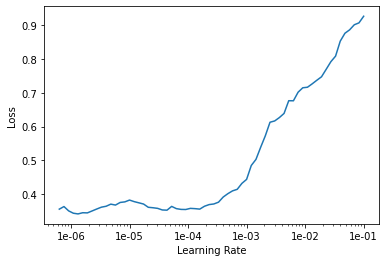

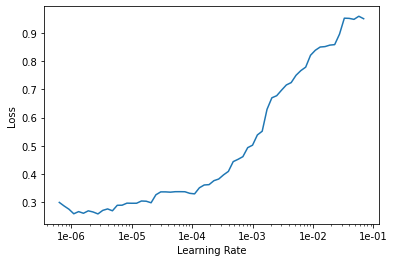

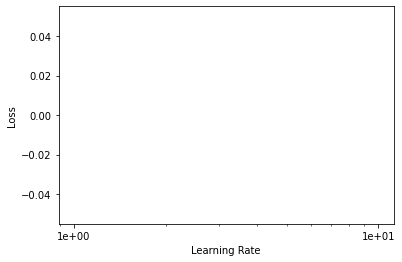

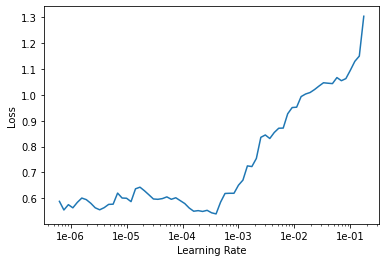

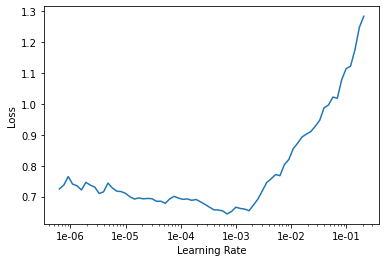

In [17]:
for mod in learn:
    mod.lr_find()
    mod.recorder.plot()

In [25]:
learn1.fit_one_cycle(5, max_lr=slice(1e-6,1e-5))
learn2.fit_one_cycle(5, max_lr=slice(1e-6,1e-5))
learn3.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))
learn4.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))
learn5.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.348453,0.388084,0.856715,04:25
1,0.334982,0.384869,0.862706,04:28
2,0.364275,0.382403,0.858213,04:28
3,0.343238,0.378080,0.861707,04:26
4,0.329748,0.378408,0.859211,04:27


epoch,train_loss,valid_loss,accuracy,time
0,0.366533,0.398559,0.856216,04:33
1,0.360166,0.389035,0.861707,04:37
2,0.294332,0.395072,0.858712,04:40
3,0.292283,0.410614,0.856715,04:36
4,0.305981,0.391734,0.859211,04:36


epoch,train_loss,valid_loss,accuracy,time
0,0.243526,0.379543,0.879680,05:00
1,0.260316,0.384242,0.871193,05:14
2,0.204298,0.363418,0.884174,05:11
3,0.134418,0.363432,0.885671,05:13
4,0.122105,0.348581,0.894159,05:09


epoch,train_loss,valid_loss,accuracy,time
0,0.540903,0.656573,0.775337,04:37
1,0.626058,0.563491,0.786820,04:34
2,0.536233,0.526254,0.823764,04:34
3,0.444167,0.453621,0.836246,04:37
4,0.364369,0.416828,0.855716,04:35


epoch,train_loss,valid_loss,accuracy,time
0,0.553180,0.543483,0.810784,04:24
1,0.530790,0.541569,0.806790,04:28
2,0.559752,0.518983,0.829755,04:24
3,0.480938,0.480223,0.833250,04:23
4,0.436633,0.465547,0.836745,04:22


In [44]:
learn1.save('resnet50-stage-2')
learn2.save('resnet152-stage-2')
learn3.save('densenet201-stage-2')
learn4.save('vgg19_bn-stage-2')
learn5.save('alexnet-stage-2')

In [45]:
learn1.path

PosixPath('data')

In [32]:
learn1.load('resnet50-stage-1');
learn1.load('resnet50-stage-1');
learn2.load('resnet152-stage-1');
learn3.load('densenet201-stage-1');
learn4.load('vgg19_bn-stage-1');
learn5.load('alexnet-stage-1');

In [33]:
interp1 = ClassificationInterpretation.from_learner(learn1)
interp2 = ClassificationInterpretation.from_learner(learn2)
interp3 = ClassificationInterpretation.from_learner(learn3)
interp4 = ClassificationInterpretation.from_learner(learn4)
interp5 = ClassificationInterpretation.from_learner(learn5)

In [34]:
interps = [[interp1,'resnet50'], 
           [interp2,'resnet152'], 
           [interp3,'densenet201'], 
           [interp4,'vgg19'], 
           [interp4,'alexnet']]

resnet50


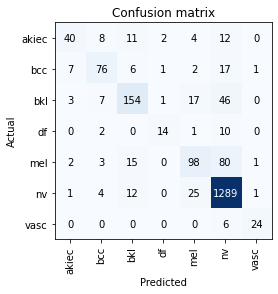

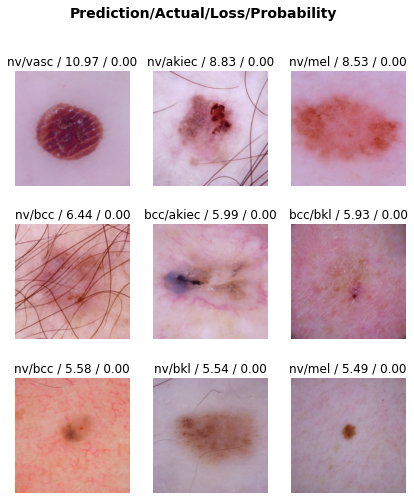

In [35]:
# confusion matrices and top loss plots

print(interps[0][1])
interps[0][0].plot_confusion_matrix()
interps[0][0].plot_top_losses(9, figsize=(7,8))

resnet152


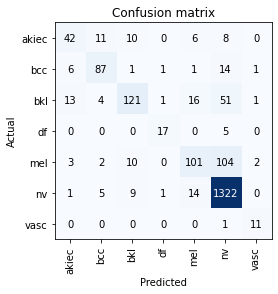

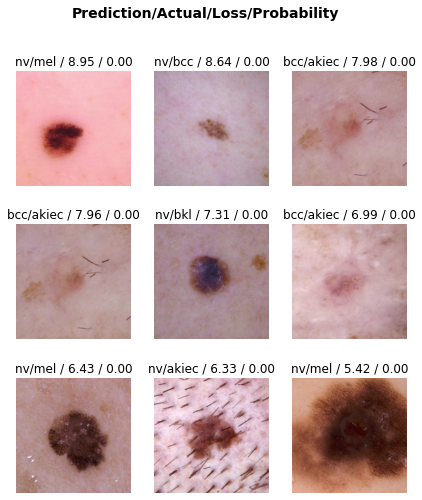

In [36]:
print(interps[1][1])
interps[1][0].plot_confusion_matrix()
interps[1][0].plot_top_losses(9, figsize=(7,8))


densenet201


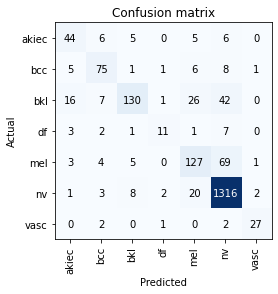

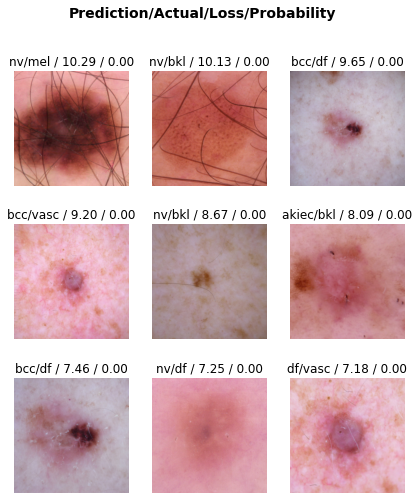

In [37]:
print(interps[2][1])
interps[2][0].plot_confusion_matrix()
interps[2][0].plot_top_losses(9, figsize=(7,8))


vgg19


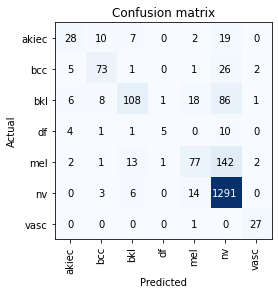

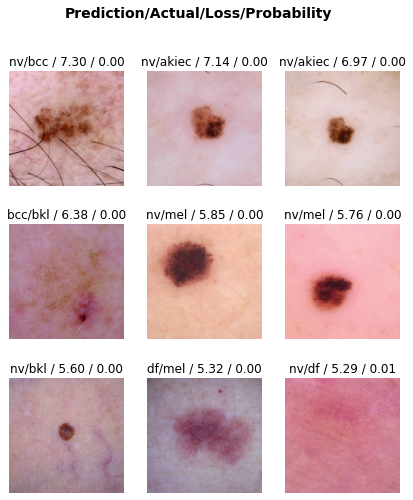

In [38]:
print(interps[3][1])
interps[3][0].plot_confusion_matrix()
interps[3][0].plot_top_losses(9, figsize=(7,8))


alexnet


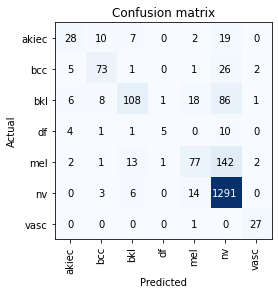

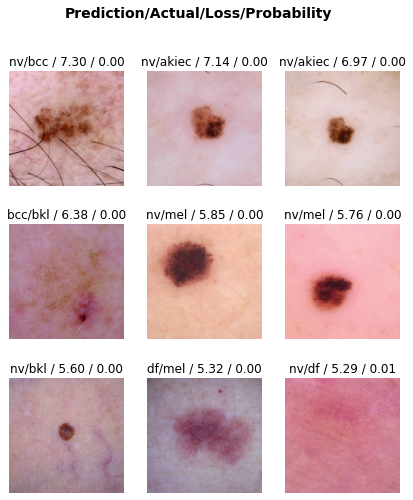

In [39]:
print(interps[4][1])
interps[4][0].plot_confusion_matrix()
interps[4][0].plot_top_losses(9, figsize=(7,8))


In [40]:
print('Tuple arrangement: Actual, predicted, # of occurences', '\n')
for i in range(len(interps)):
    print(interps[i][1])
    print(interps[i][0].most_confused(min_val=2))


Tuple arrangement: Actual, predicted, # of occurences 

resnet50
[('mel', 'nv', 80), ('bkl', 'nv', 46), ('nv', 'mel', 25), ('bcc', 'nv', 17), ('bkl', 'mel', 17), ('mel', 'bkl', 15), ('akiec', 'nv', 12), ('nv', 'bkl', 12), ('akiec', 'bkl', 11), ('df', 'nv', 10), ('akiec', 'bcc', 8), ('bcc', 'akiec', 7), ('bkl', 'bcc', 7), ('bcc', 'bkl', 6), ('vasc', 'nv', 6), ('akiec', 'mel', 4), ('nv', 'bcc', 4), ('bkl', 'akiec', 3), ('mel', 'bcc', 3), ('akiec', 'df', 2), ('bcc', 'mel', 2), ('df', 'bcc', 2), ('mel', 'akiec', 2)]
resnet152
[('mel', 'nv', 104), ('bkl', 'nv', 51), ('bkl', 'mel', 16), ('bcc', 'nv', 14), ('nv', 'mel', 14), ('bkl', 'akiec', 13), ('akiec', 'bcc', 11), ('akiec', 'bkl', 10), ('mel', 'bkl', 10), ('nv', 'bkl', 9), ('akiec', 'nv', 8), ('akiec', 'mel', 6), ('bcc', 'akiec', 6), ('df', 'nv', 5), ('nv', 'bcc', 5), ('bkl', 'bcc', 4), ('mel', 'akiec', 3), ('mel', 'bcc', 2), ('mel', 'vasc', 2)]
densenet201
[('mel', 'nv', 69), ('bkl', 'nv', 42), ('bkl', 'mel', 26), ('nv', 'mel', 20), ('bk

In [41]:
worst = [data1, data2, data3, data4, data5]

for i in range(len(interps)):
    worst[i] = interps[0][0].most_confused(min_val=2)

In [42]:
df1 = pd.DataFrame(worst[0], columns =['Actual', 'Predicted', 'Occurences'])
df2 = pd.DataFrame(worst[1], columns =['Actual', 'Predicted', 'Occurences'])
df3 = pd.DataFrame(worst[2], columns =['Actual', 'Predicted', 'Occurences'])
df4 = pd.DataFrame(worst[3], columns =['Actual', 'Predicted', 'Occurences'])
df5 = pd.DataFrame(worst[4], columns =['Actual', 'Predicted', 'Occurences'])

In [43]:
df1.to_csv('resnet50.csv')
df2.to_csv('resnet152.csv')
df3.to_csv('densenet201.csv')
df4.to_csv('vgg19_bn.csv')
df5.to_csv('alexnet.csv')